## Rede Neural

### Criação sem K-fold 

In [18]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from keras import regularizers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

df_final = pd.read_csv("../data/df_processed.csv")

X = df_final.drop(columns=["Email Type"])
y = df_final["Email Type"]

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=777)

input_dim = X_train.shape[1]

model = Sequential()
model.add(Dense(10, input_dim=input_dim, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(4, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))

optimizer = optimizers.Adam(learning_rate=0.01)

model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

print(model.summary())

history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

print("Accuracy on Test Set:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=[str(c) for c in label_encoder.classes_]))



c:\Users\sssww\Desktop\vscode\ml_pln\venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 10)             │         2,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 4)              │            44 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,059 (8.04 KB)

 Trainable params: 2,059 (8.04 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8873 - loss: 0.4041 - val_accuracy: 0.9651 - val_loss: 0.1361
Epoch 2/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9630 - loss: 0.1351 - val_accuracy: 0.9686 - val_loss: 0.0991
Epoch 3/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9675 - loss: 0.1028 - val_accuracy: 0.9704 - val_loss: 0.0901
Epoch 4/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9713 - loss: 0.0910 - val_accuracy: 0.9647 - val_loss: 0.1069
Epoch 5/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9682 - loss: 0.0994 - val_accuracy: 0.9740 - val_loss: 0.0787
Epoch 6/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9726 - loss: 0.0845 - val_accuracy: 0.9704 - val_loss: 0.0880
Epoch 7/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9752 - loss: 0.0751 - val_accuracy: 0.9704 - val_loss: 0.0879
Epoch 8/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9797 - loss: 0.0668 - val_accurac

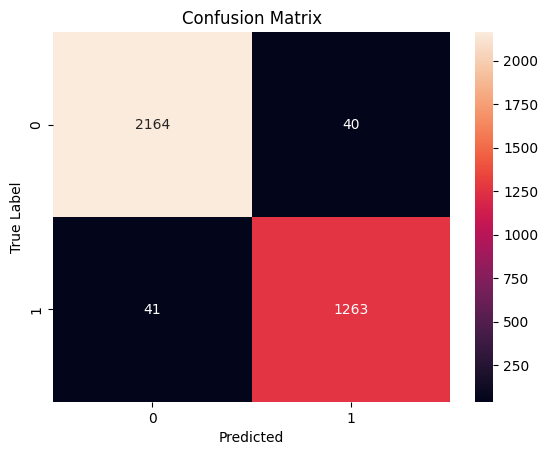

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True Label")
plt.show()


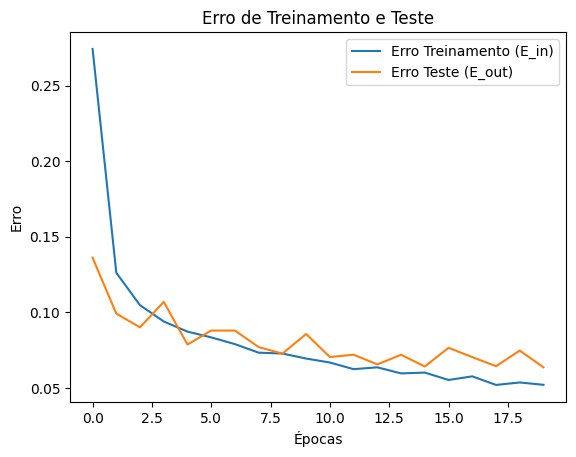


Erro de Treinamento (E_in): 0.0470
Erro de Teste (E_out): 0.0866
Acurácia no Treinamento: 0.9852
Acurácia no Teste: 0.9769


In [20]:
import matplotlib.pyplot as plt

# Erro de Treinamento e Teste
plt.plot(history.history['loss'], label='Erro Treinamento (E_in)')
plt.plot(history.history['val_loss'], label='Erro Teste (E_out)')
plt.title('Erro de Treinamento e Teste')
plt.xlabel('Épocas')
plt.ylabel('Erro')
plt.legend()
plt.show()

E_in = model.evaluate(X_train, y_train, verbose=0)[0]
E_out = model.evaluate(X_test, y_test, verbose=0)[0]

print(f"\nErro de Treinamento (E_in): {E_in:.4f}")
print(f"Erro de Teste (E_out): {E_out:.4f}")

loss_train, acc_train = model.evaluate(X_train, y_train, verbose=0)
print(f"Acurácia no Treinamento: {acc_train:.4f}")

loss_test, acc_test = model.evaluate(X_test, y_test, verbose=0)
print(f"Acurácia no Teste: {acc_test:.4f}")


### Com K-fold

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import numpy as np

X = df_final.drop(columns=["Email Type"]).values
y = LabelEncoder().fit_transform(df_final["Email Type"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

input_dim = X_train.shape[1]
BATCH_SIZE = 32
EPOCHS = 20
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracies = []
losses = []

for fold, (train_idx, val_idx) in enumerate(skf.split(X_train, y_train), 1):
    print(f"\nFold {fold}")

    X_tr, X_val = X_train[train_idx], X_train[val_idx]
    y_tr, y_val = y_train[train_idx], y_train[val_idx]

    model = Sequential([
        Dense(8, input_dim=input_dim, activation='relu'),
        Dense(4, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    model.compile(loss='binary_crossentropy', optimizer=SGD(learning_rate=0.01), metrics=['accuracy'])
    model.fit(X_tr, y_tr, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_val, y_val), verbose=0)

    loss, acc = model.evaluate(X_val, y_val, verbose=0)
    print(f"Validação - Loss: {loss:.4f} | Acurácia: {acc:.4f}")

    losses.append(loss)
    accuracies.append(acc)

print(f"Acurácia média: {np.mean(accuracies):.4f} (+/- {np.std(accuracies):.4f})")
print(f"Loss médio:     {np.mean(losses):.4f} (+/- {np.std(losses):.4f})")

model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=0)
y_pred = (model.predict(X_test) > 0.5).astype(int)

target_names = [str(c) for c in np.unique(y)]
print("\nAvaliação Final no Conjunto de Teste")
print(classification_report(y_test, y_pred, target_names=target_names))



Fold 1


c:\Users\sssww\Desktop\vscode\ml_pln\venv2\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Validação - Loss: 0.1431 | Acurácia: 0.9530

Fold 2
Validação - Loss: 0.0982 | Acurácia: 0.9701

Fold 3
Validação - Loss: 0.0879 | Acurácia: 0.9743

Fold 4
Validação - Loss: 0.1088 | Acurácia: 0.9604

Fold 5
Validação - Loss: 0.1064 | Acurácia: 0.9654

==== Resultados da Validação Cruzada ====
Acurácia média: 0.9646 (+/- 0.0075)
Loss médio:     0.1089 (+/- 0.0186)
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

==== Avaliação Final no Conjunto de Teste ====
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      2196
           1       0.97      0.96      0.96      1312

    accuracy                           0.97      3508
   macro avg       0.97      0.97      0.97      3508
weighted avg       0.97      0.97      0.97      3508



## Salvando modelo

In [21]:
import pickle
with open("../models/models_phishing/model_phishing.pkl", "wb") as f:
    pickle.dump(model, f)